# CRCNS PFC2 Dataset
Spike with 96 channel LFP (PFC: 1-64, CA1: 65-96)

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/Lauren/Voytek/spectralCV')
sys.path.append('/Users/rdgao/Documents/code/research/spectralCV/')
sys.path.append('/Users/rdgao/Documents/code/research/neurodsp/')

In [302]:
%matplotlib inline

# imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
CKEYS = plt.rcParams['axes.prop_cycle'].by_key()['color']

import neurodsp as ndsp
from scv_funcs import lfpca
from scv_funcs import utils

In [179]:
# load LFP data
basefolder ='/Users/rdgao/Documents/data/CRCNS/pfc2/EE.049/EE.049'
lfp_file = basefolder+ '_LFP.mat'
lfp_struct = sp.io.loadmat(lfp_file, squeeze_me=True)
data = lfp_struct['lfp'][:96,:]
t = data_struct['t']
fs = data_struct['fs'] #1250

In [185]:
# load spike data
spike_file = basefolder + '_Behavior.mat'
spike_struct = sp.io.loadmat(spike_file, squeeze_me=True)
cell_info = spike_struct['spikeph']
spike_ind = spike_struct['spikeind'] 
spike_t = spike_struct['spiket'] # 20kHz
spike_struct['Cells']

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  32,  35,  37,  39,  41,  42,  48,  50,  51,  52,  54,
        55,  56,  59,  60,  61,  62,  63,  64,  65,  67,  68,  69,  70,
        73,  78,  79,  80,  81,  82,  85,  86,  87,  88,  89,  90,  91,
        92,  94,  96,  97,  98,  99, 100, 101, 102, 104, 105, 106, 107,
       108, 109], dtype=uint8)

In [41]:
analysis_param = {'nperseg': 1250,
                 'noverlap': 0,
                 'spg_outlierpct': 2.,
                 'max_freq':200}

# initialize object with data and parameters
pfc_lfpca = lfpca.LFPCA(analysis_param)
pfc_lfpca.populate_ts_data(data[::4,:], fs) # take every 8th channel(2 per shank)
#pfc_lfpca.populate_ts_data(data, fs)

# compute all spectral attributes
pfc_lfpca.compute_all_spectral()

In [42]:
# compute KS-test fit against null exponential hypothesis
pfc_lfpca.compute_KS_expfit() # this takes a few minutes

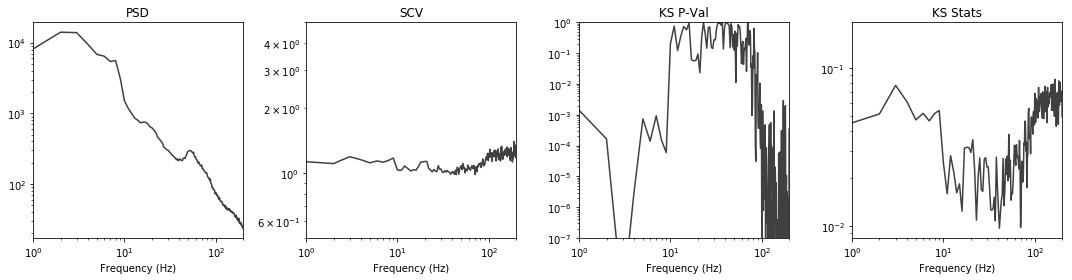

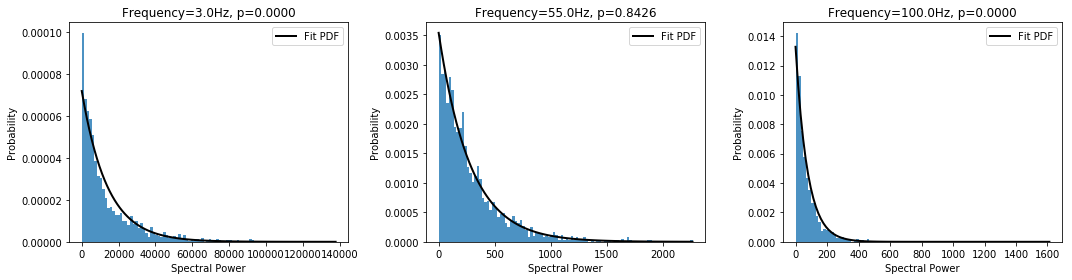

In [176]:
plot_chan = 9
plt.figure(figsize=(15,4))
pfc_lfpca.plot_spectral(plot_mean=False, plot_chan=plot_chan)

plot_freqs = [3,55,100]
plt.figure(figsize=(15,4))
for i,f in enumerate(plot_freqs):
    plt.subplot(1,3,i+1)
    pfc_lfpca.plot_expfit(chan=plot_chan, freq_ind=f)

plt.tight_layout()

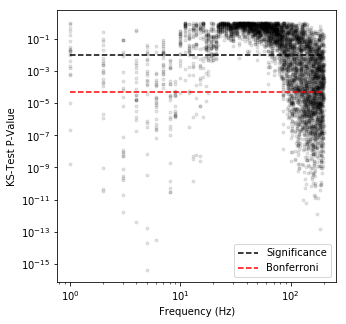

In [48]:
# plot
sig_alpha = 0.01
plt.figure(figsize=(5,5))
plt.loglog(pfc_lfpca.f_axis, pfc_lfpca.ks_pvals[:,:].T, 'k.', alpha=0.1)
plt.plot(pfc_lfpca.f_axis, np.ones_like(pfc_lfpca.f_axis)*sig_alpha, 'k--', label='Significance')
plt.plot(pfc_lfpca.f_axis, np.ones_like(pfc_lfpca.f_axis)*sig_alpha/len(pfc_lfpca.f_axis), 'r--', label='Bonferroni')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('KS-Test P-Value');

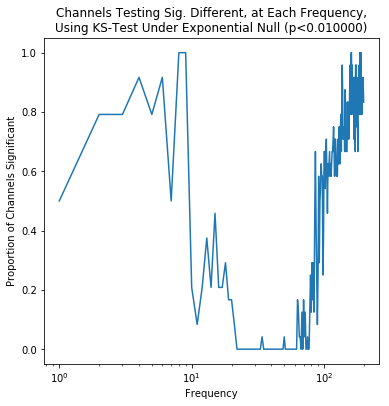

In [158]:
sig_thres = sig_alpha#/len(pfc_lfpca.f_axis)
plt.figure(figsize=(6,6))
plt.semilogx(pfc_lfpca.f_axis,np.sum(pfc_lfpca.ks_pvals<sig_thres,0)/pfc_lfpca.numchan )
plt.xlabel('Frequency')
plt.ylabel('Proportion of Channels Significant')
plt.title('Channels Testing Sig. Different, at Each Frequency,\nUsing KS-Test Under Exponential Null (p<%f)'%sig_thres);

/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


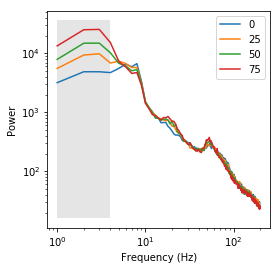

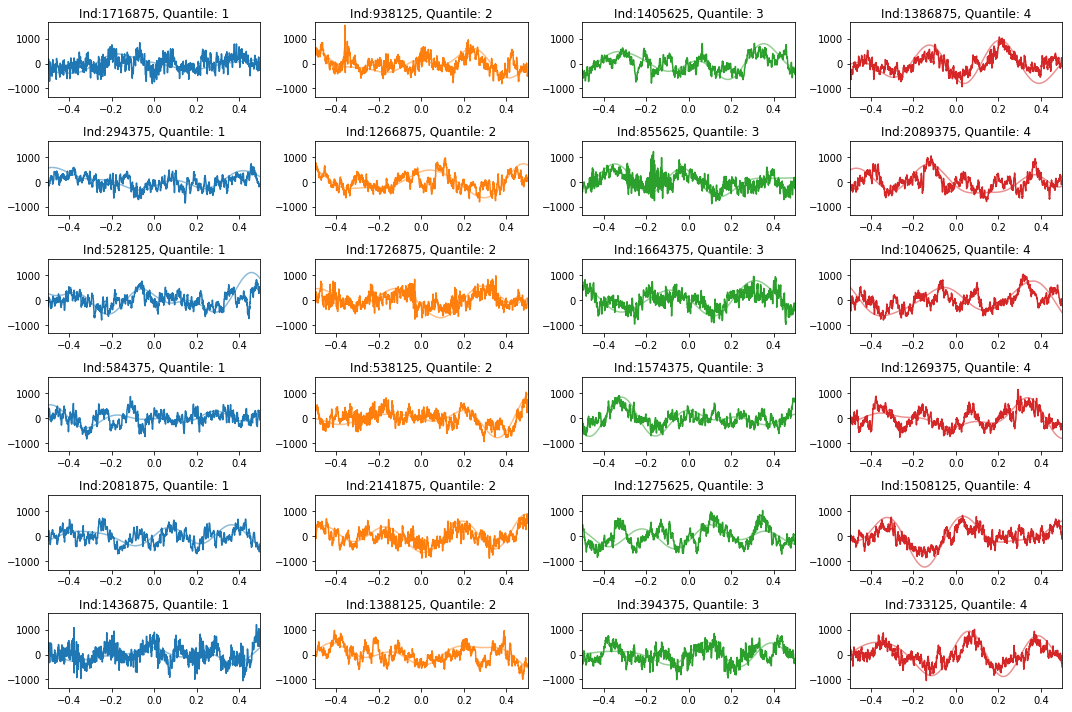

In [150]:
plot_chan = 10
rank_freqs = (1,4)
plt.figure(figsize=(4,4))
pwr_dgt, power_binned = utils.percentile_spectrogram(pfc_lfpca.spg[plot_chan,:,:], pfc_lfpca.f_axis, rank_freqs=rank_freqs, pct=range(0,100,25))
plt.figure(figsize=(15,10))
utils.plot_power_examples(lf.data[plot_chan,:], lf.fs, lf.t_axis, pwr_dgt, rank_freqs, N_cycles=7, power_adj=2)

# Spiking & LFP analysis
Spiking variables (for both single unit and population total):
- Total Spikes (Firing Rate, FR)
- ISI CV (Fano Factor, FF)
    
### STFT analysis (can limit to windows with trials)
Per-window:
- bandlimited power
Across-window:
- bandlimited power
- bandlimited SCV/KS stat

### Filter-Hilbert analysis
Rolling window: 
- power & power variability vs. FR & FF


In [321]:
spike_struct['CellsP']

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 35, 37, 39, 41, 42,
       48, 50, 51, 52, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69,
       70, 73, 78], dtype=uint8)

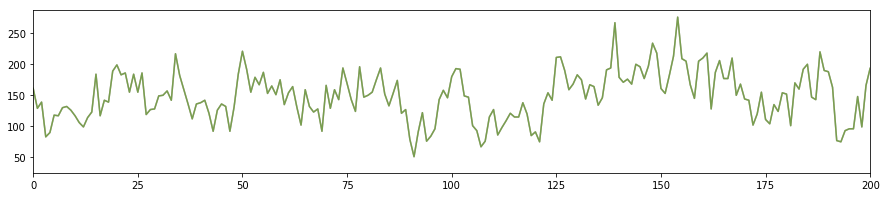

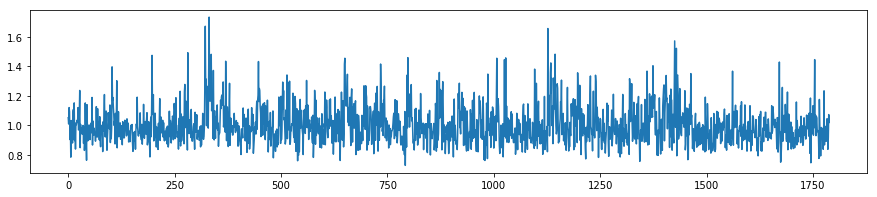

In [325]:
# 3 equivalent ways to compute firing rate (spikes per window)
# 1. binarize then slide as a binary time series
spk_t = spike_t[spike_ind<78]
bsp = utils.binarize_spiketime(spk_t, data.shape[1], spike_rate=20000, bin_rate=1250)
slg = utils.yield_sliding_window_ts(bsp, nperseg=1250, noverlap=0)
fr = []
for i,win in enumerate(slg):
    fr.append(sum(win))        
fr = np.array(fr) 

# 2. binarize in the equivalent time window (though this cannot handle overlap)
bsp_fr = utils.binarize_spiketime(spk_t, int(data.shape[1]/1250+1), spike_rate=20000, bin_rate=1)

# 3. compute directly by sliding window over the spike times
slg = utils.yield_sliding_window_pp(spk_t, fs=20000, win_len=1., overlap_len=0.)
pp_fr = []
pp_isicv = []
for i,win in enumerate(slg): 
    pp_fr.append(len(win[0]))
    # also compute ISI CV
    if len(win[0])>1:
        isi = np.diff(win[0])
        pp_isicv.append(isi.std()/isi.mean())
    else:
        pp_isicv.append(0.)
        
pp_fr = np.array(pp_fr)
pp_isicv = np.array(pp_isicv)

plt.figure(figsize=(15,3))
plt.plot(fr, alpha=0.5)
plt.plot(bsp_fr, alpha=0.5)
plt.plot(pp_fr, alpha=0.5)
plt.xlim([0,200])

plt.figure(figsize=(15,3))
plt.plot(pp_isicv)
#plt.xlim([1000,1200])

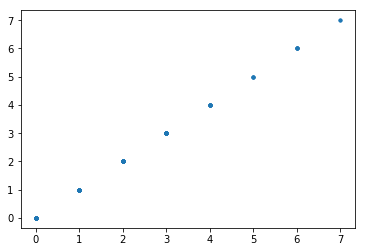

In [303]:
fr_sm = []
slg = utils.yield_sliding_window_pp(spike_t[spike_ind==5], 20000, 1., 0)
for i,win in enumerate(slg):
    fr_sm.append(len(win[0]))


plt.plot(fr_sm, fr[:-6], '.')


In [ ]:
N_cycles=7
noise_band = (30,50)
filt_thr = 0.05
_, _, _, ker_len = lfpca.compute_BP_HT(data[0,:],fs,noise_band,N_cycles,filt_thr)
skip_lens = [1, int(ker_len/4), int(ker_len/2), ker_len]
test_stats = np.zeros((numtrials, 4, len(skip_lens)))
for tr, data in enumerate(syn_noise):
    noise_power, _, val_inds, ker_len = lfpca.compute_BP_HT(data-data.mean(),fs,noise_band,N_cycles,filt_thr)
    for ind, sl in enumerate(skip_lens):
        test_stats[tr,[0,2,3],ind] = lfpca.fit_test_exp(noise_power[val_inds][::sl])
        test_stats[tr,1,ind] = noise_power[val_inds][::sl].std()/noise_power[val_inds][::sl].mean()